In [1]:
%config Completer.use_jedi = False # To make auto-complete faster

#Reloads imported files automatically
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../utils/')

In [2]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as mplcmaps
from mpl_toolkits.mplot3d import Axes3D

def set_matplotlib_params():
    plt.rcParams['mathtext.fontset'] = 'cm'
    plt.rcParams['font.family'] = 'STIXGeneral'

    plt.rcParams['xtick.top'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.size'] = 10
    plt.rcParams['ytick.major.size'] = 10
    plt.rcParams['xtick.minor.size'] = 6
    plt.rcParams['ytick.minor.size'] = 6

    plt.rcParams['hatch.linewidth'] = 0.5

    plt.rcParams["figure.figsize"] = [12,8]
    plt.rcParams["font.size"] = 13
    plt.rcParams["axes.titlesize"] = "medium"

def reset_rcParams():
    plt.rcParams.update(plt.rcParamsDefault)

set_matplotlib_params()

In [3]:
import compute_variables as CV
import miscellaneous_functions as MF
import plotting_helpers as PH
import velocity_plot as VP
import map_functions as mapf

In [4]:
%matplotlib inline

In [5]:
symbol_dict,units_dict = mapf.get_kinematic_symbols_dict(),mapf.get_kinematic_units_dict()

In [6]:
save_path = "/Users/luismi/Desktop/MRes_UCLan/Other_stuff/Mathematica/anicorr/"

save_path += "python/"
MF.create_dir(save_path)

print("Saving in",save_path)

Saving in /Users/luismi/Desktop/MRes_UCLan/UCLan_Mres/Mathematica/anicorr/python/


# 3D

In [103]:
plt.rcParams["font.size"]=20

In [124]:
ani_min = -10
cmap = "terrain"

In [122]:
save_bool = True
# save_bool = False

.pdf
.png
Saved /Users/luismi/Desktop/MRes_UCLan/UCLan_Mres/Mathematica/anicorr/python/3D_terrain_-10ani_terrainCmap


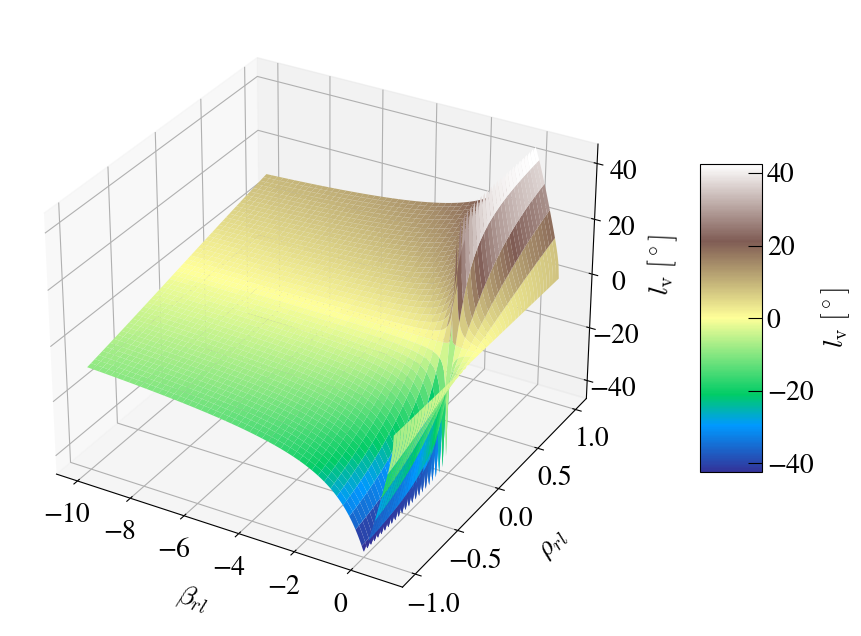

In [123]:
# plot

# Create a meshgrid for the range of x and y values
x = np.linspace(ani_min, 1, 400)  # Increase the number for a finer mesh
y = np.linspace(-1, 1, 400)  # Increase the number for a finer mesh
X, Y = np.meshgrid(x, y)

# Calculate Z using the provided function
Z = 90 / np.pi * np.arctan(Y / np.abs(X) * np.sqrt(1 - X))

# Ensure Z ranges from -45 to 45
Z = np.clip(Z, -45, 45)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cmap)

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.08)
cbar.set_label(symbol_dict["tilt_abs"]+units_dict["tilt_abs"])

# Set labels
ax.set_xlabel(symbol_dict["anisotropy"],labelpad=15)
ax.set_ylabel(symbol_dict["correlation"],labelpad=15)
ax.set_zlabel(symbol_dict["tilt_abs"]+units_dict["tilt_abs"],labelpad=10)

# Set z range
ax.set_zlim(-45, 45)

if save_bool:
    filename = f"3D_terrain_{ani_min}ani_{cmap}Cmap"
    
    for fileformat in [".pdf",".png"]:
        plt.savefig(save_path+filename+fileformat,bbox_inches="tight",dpi=250)
        print(fileformat)
    print("Saved",save_path+filename)
plt.show()

# 2D

In [7]:
plt.rcParams["font.size"]=23

In [353]:
imshow_bool = True
# imshow_bool = False

unfilled_contours_bool = True
# unfilled_contours_bool = False

unfilled_contours_cmap = "seismic"

unfilled_levelstep = 10
unfilled_levels = np.arange(-40,40+unfilled_levelstep,unfilled_levelstep)

In [354]:
cmap = "jet"
ani_min = -10

level_step = 0.5
tick_step = 20

filled_levels=np.arange(-45,45+level_step,level_step)

In [359]:
save_bool = True
# save_bool = False

2D_contours_-10ani_imshow_jetCmap_unfilledContours-seismic10step
.pdf
.png
Saved in /Users/luismi/Desktop/MRes_UCLan/UCLan_Mres/Mathematica/anicorr/python/


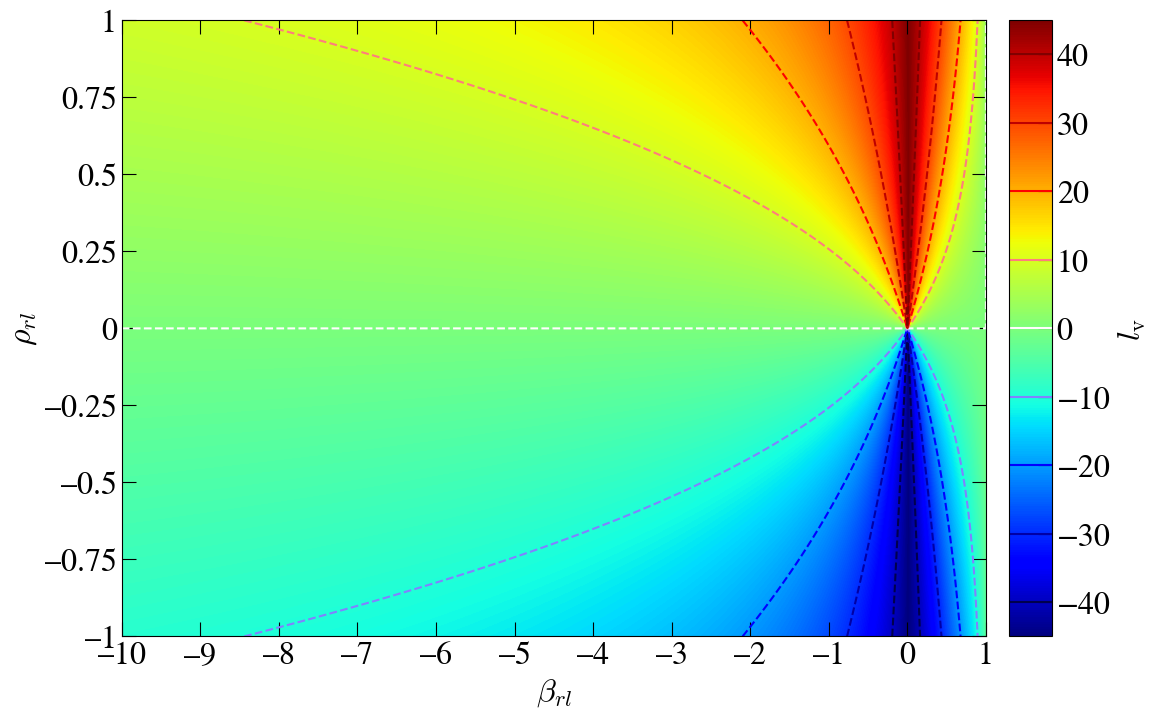

In [360]:
# plot

x = np.linspace(ani_min, 1, 2500)
y = np.linspace(-1, 1, 2500)
X, Y = np.meshgrid(x, y)

Z = 90 / np.pi * np.arctan(Y / np.abs(X) * np.sqrt(1 - X))

fig,(ax,cax) = plt.subplots(ncols=2,gridspec_kw={"width_ratios":[1,0.05],"wspace":0.05})

if imshow_bool:
    surf = ax.imshow(Z,cmap=cmap,origin="lower",extent=[min(x),max(x),min(y),max(y)])
else:
    surf = ax.contourf(X,Y,Z,cmap=cmap,levels=filled_levels)
    cax.set_yticks(filled_levels[::tick_step])
    
plt.colorbar(surf,cax=cax)
    
if unfilled_contours_bool:
    ax.contour(X,Y,Z,levels=unfilled_levels,cmap=unfilled_contours_cmap,linestyles="--")
    
    norm = plt.Normalize(vmin=min(unfilled_levels), vmax=max(unfilled_levels))
    unfilled_cmap = mplcmaps[unfilled_contours_cmap]
    
    for lev in zip(unfilled_levels):
        cax.axhline(lev,c=unfilled_cmap(norm(lev)))

if True: # axes
    cax.set_ylabel(r"$l_\mathrm{v}$")

    ax.set_xlabel(r"$\beta_{rl}$")
    ax.set_ylabel(r"$\rho_{rl}$")

    xtick_step = 1
    xticks = np.concatenate([np.arange(ani_min,0+xtick_step,xtick_step),[1]])
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{'–' if t<0 else ''}{abs(MF.check_int(t))}" for t in xticks])

    yticks = ax.get_yticks()
    ax.set_yticks(yticks) #avoid warning
    ax.set_yticklabels([f"{'–' if t<0 else ''}{abs(MF.check_int(t))}" for t in yticks])

    ax.set_aspect("auto")

if True: # save
    imshow_str = "_imshow" if imshow_bool else f"_contours{level_step}levelStep"
    
    unfilled_contours_str = f"_unfilledContours-{unfilled_contours_cmap}{unfilled_levelstep}step" if unfilled_contours_bool else ""
    
    filename = f"2D_contours_{ani_min}ani{imshow_str}_{cmap}Cmap{unfilled_contours_str}"
    print(filename)

    if save_bool:
        for fileformat in [".pdf",".png"]:
            plt.savefig(save_path+filename+fileformat,bbox_inches="tight",dpi=250)
            print(fileformat)
        print("Saved in",save_path)

    plt.show()

# 1D

In [137]:
plt.rcParams["font.size"]=23

In [174]:
corr_fixedVals = [0.5,0.75,1]
colors = ["red","darkorange","gold"]

ani_min = -20

In [185]:
save_bool = True
# save_bool = False

1D_variation_-20ani_3corrVals0.5to1_jetCmap
.pdf
.png
Saved /Users/luismi/Desktop/MRes_UCLan/UCLan_Mres/Mathematica/anicorr/python/


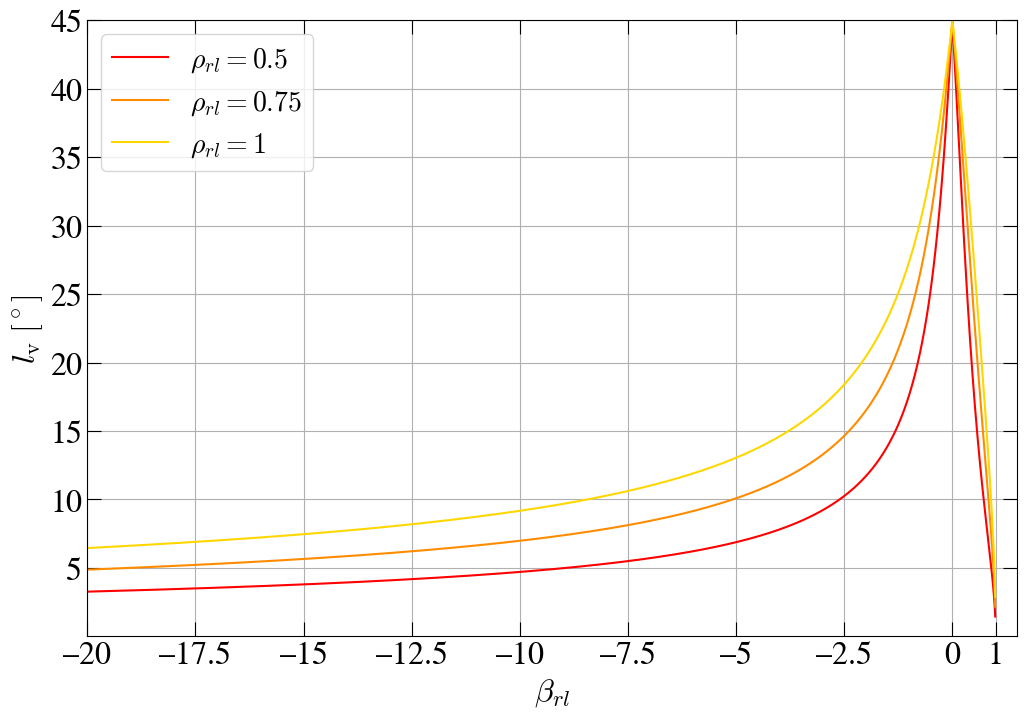

In [186]:
# plot

fig,ax=plt.subplots()

ani = np.arange(ani_min,1,0.01)

for corr,color in zip(corr_fixedVals,colors):
    vertex = 1/2*np.arctan(corr*np.sqrt(1-ani)/np.abs(ani))*180/np.pi

    ax.plot(ani,vertex,color=color,label=symbol_dict["correlation"]+r"$=%s$"%str(corr))

ax.set_ylim(0,45)
ax.set_xlim(ani_min,1.5)

xtick_step = 2.5
xticks = np.concatenate([np.arange(ani_min,0+xtick_step,xtick_step),[1]])
ax.set_xticks(xticks)
ax.set_xticklabels([f"{'–' if t<0 else ''}{abs(MF.check_int(t))}" for t in xticks])

ax.set_yticks(np.arange(5,45+5,5))

ax.set_xlabel(symbol_dict["anisotropy"])
ax.set_ylabel(symbol_dict["tilt_abs"]+units_dict["tilt_abs"])

plt.legend(fontsize=20)
plt.grid(axis="both")

if True:
    corr_string = f"{len(corr_fixedVals)}corrVals{min(corr_fixedVals)}to{max(corr_fixedVals)}"
    
    filename = f"1D_variation_{ani_min}ani_{corr_string}_{cmap}Cmap"
    print(filename)

    if save_bool:
        for fileformat in [".pdf",".png"]:
            plt.savefig(save_path+filename+fileformat,bbox_inches="tight",dpi=250)
            print(fileformat)
        print("Saved",save_path)

plt.show()

# Velocity plot

In [47]:
ani = -10
corr = 1

std_r = 1
std_l = std_r*(1-ani)

covxy = corr*std_r*std_l

tilt_abs = CV.calculate_tilt_from_moments(covxy=covxy,varx=std_r**2,vary=std_l**2,absolute=True)

n_points = 5000

r_vals = np.random.normal(0,std_r,n_points)
l_vals = np.random.normal(0,std_l,n_points)

rotated_x,rotated_y = PH.rotate_by_angle(x=r_vals,y=l_vals,angle=tilt_abs)

Using smoothing 1


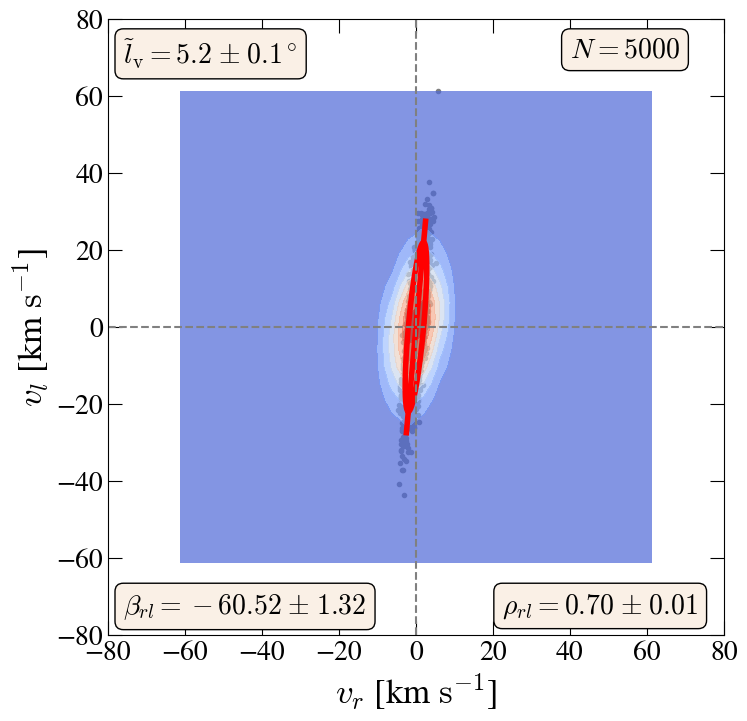

In [55]:
VP.velocity_plot(vx=rotated_x,vy=rotated_y,tilt_abs=True,vel_max=max([max(rotated_x),max(rotated_y)]),tickstep=20)

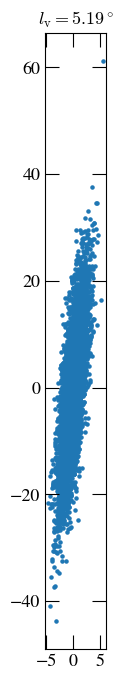

In [56]:
fig,ax=plt.subplots()

ax.scatter(rotated_x,rotated_y,s=5)
ax.set_title(r"$l_\mathrm{v}=%.2f ^\circ$"%tilt_abs)
ax.set_aspect("equal")
plt.show()